### Import Libraries

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import leargist
from PIL import Image
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import os
import re


### Import Dataset

In [3]:
dataset_processed_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_processed/'
dataset_file = 'filtered_dataset.npy' 
dataset_array = np.load(dataset_processed_path + dataset_file)
gist_dataset = np.load(dataset_processed_path + 'gist.npy')

### Create GIST Dataset

In [17]:
# Indexes -> [0] = ID image
#            [1--7] = Pose
#            [8--967] = GIST descriptors

data = np.empty((len(dataset_array), 1+7+960))
for i in range(len(dataset_array)):
    image = Image.open(dataset_processed_path + str(dataset_array[i,0].astype(int)) + '.jpg')
    gist = leargist.color_gist(image)
    data[i,0] = dataset_array[i,0]
    data[i,1:8] = dataset_array[i,1:8]
    data[i,8:] = gist
    
np.save(dataset_processed_path + 'gist.npy', data)

/tmp/ipykernel_35978/1203956175.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist = leargist.color_gist(image)


### Similarity Metrics Analysis (don't run it!!)

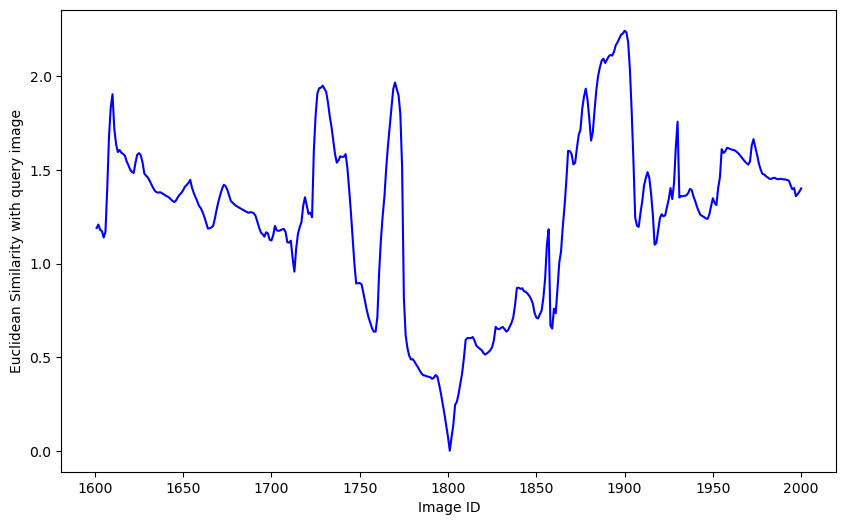

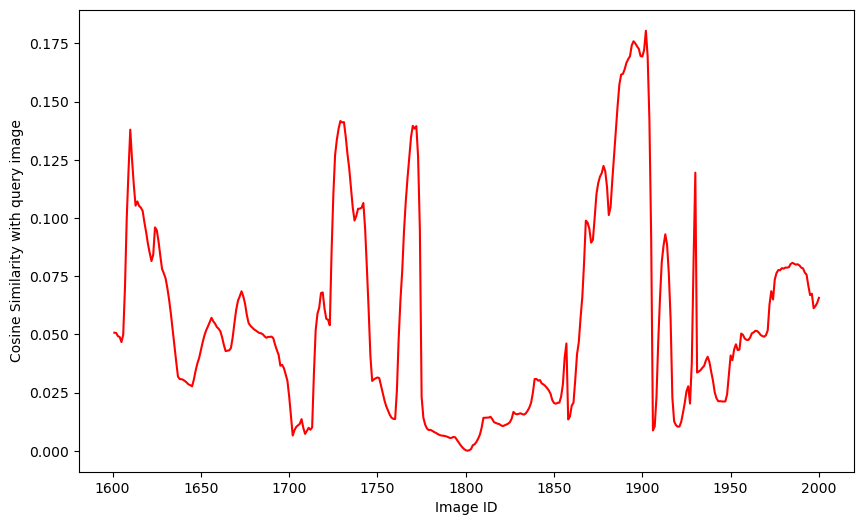

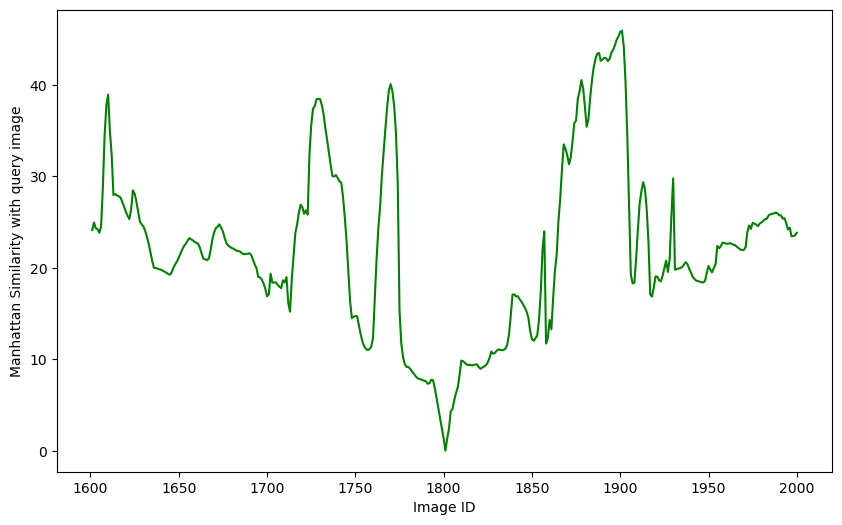

In [3]:
dataset_gist = np.load(dataset_not_processed_path + 'not_processed_gist.npy')
query_index = 1800
gist_query_image = dataset_gist[query_index,8:]
num_images = 200
euclidean_similarities = np.empty(2 * num_images)
cosine_similarities = np.empty(2 * num_images)
manhattan_similarities = np.empty(2 * num_images)
for i in range(query_index-num_images,query_index+num_images):
    gist_image = dataset_gist[i,8:]
    euclidean_similarities[i-query_index+num_images] = np.linalg.norm(gist_query_image-gist_image)
    cosine_similarities[i-query_index+num_images] = distance.cosine(gist_query_image, gist_image)
    manhattan_similarities[i-query_index+num_images] = distance.cityblock(gist_query_image, gist_image)
    
# Plot Euclidean similarities
plt.figure(figsize=(10, 6))
plt.plot(range(1+query_index-num_images, query_index+num_images+1), euclidean_similarities, 'b')
plt.xlabel('Image ID')
plt.ylabel('Euclidean Similarity with query image')
plt.show()

# Plot Cosine similarities
plt.figure(figsize=(10, 6))
plt.plot(range(1+query_index-num_images, query_index+num_images+1), cosine_similarities, 'r')
plt.xlabel('Image ID')
plt.ylabel('Cosine Similarity with query image')
plt.show()

# Plot Manhattan similarities
plt.figure(figsize=(10, 6))
plt.plot(range(1+query_index-num_images, query_index+num_images+1), manhattan_similarities, 'g')
plt.xlabel('Image ID')
plt.ylabel('Manhattan Similarity with query image')
plt.show()

##### Normilized Metrics and Comparison (don't run it!!)

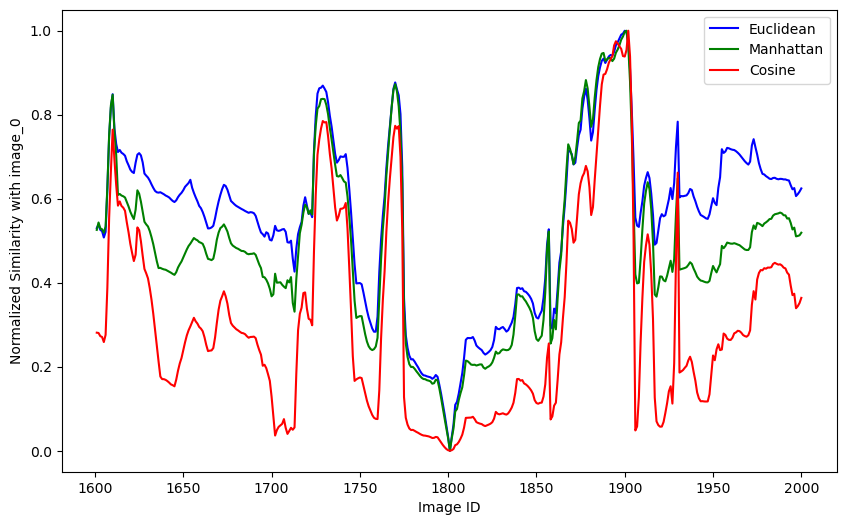

In [4]:
# Initialize a scaler
scaler = MinMaxScaler()

# Reshape the similarities to fit the scaler
euclidean_similarities = euclidean_similarities.reshape(-1, 1)
manhattan_similarities = manhattan_similarities.reshape(-1, 1)
cosine_similarities = cosine_similarities.reshape(-1, 1)

# Fit the scaler to the data and transform the data
euclidean_similarities_normalized = scaler.fit_transform(euclidean_similarities)
manhattan_similarities_normalized = scaler.fit_transform(manhattan_similarities)
cosine_similarities_normalized = scaler.fit_transform(cosine_similarities)

# Plot normalized Euclidean and Manhattan similarities
plt.figure(figsize=(10, 6))
plt.plot(range(1+query_index-num_images, query_index+num_images+1), euclidean_similarities_normalized, 'b', label='Euclidean')
plt.plot(range(1+query_index-num_images, query_index+num_images+1), manhattan_similarities_normalized, 'g', label='Manhattan')
plt.plot(range(1+query_index-num_images, query_index+num_images+1), cosine_similarities_normalized, 'r', label='Cosine')
plt.xlabel('Image ID')
plt.ylabel('Normalized Similarity with image_0')
plt.legend()
plt.show()

### Plot Positions of Filtered Dataset

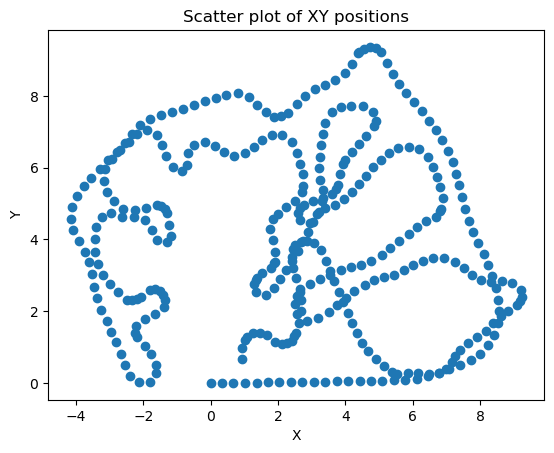

In [4]:
gist_dataset = np.load(dataset_processed_path + 'gist.npy')
positions = gist_dataset[:, 1:3]

# Create scatter plot
plt.scatter(positions[:, 0], positions[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of XY positions')
plt.show()

## Image Retrieval
#### Suppose that after the trigger mechanism, we start to acquire RGB images while we move a little bit the robot. I want to calculate top-N position for every query image 

##### TEST 1 - Query 1 - Top 1

/tmp/ipykernel_17782/1396315776.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_query = leargist.color_gist(image_reloc)


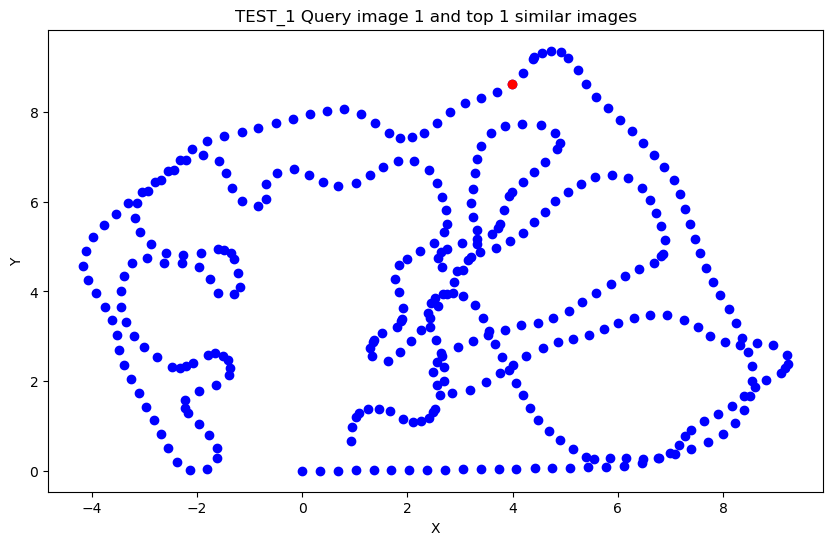

In [8]:
image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
image_reloc = Image.open(image_reloc_path + 'test_1/' + 'image_reloc_0_1.jpg')

N = 1
gist_query = leargist.color_gist(image_reloc)

similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])

sorted_indices = similarities.argsort()
top_N_indices = sorted_indices[:N]
top_N_images = gist_dataset[top_N_indices]

# Extract XY positions of top 10 images
top_N_positions_1 = top_N_images[:, 1:3]
top_N_similarities_1 = similarities[top_N_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
plt.scatter(top_N_positions_1[:, 0], top_N_positions_1[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_1 Query image 1 and top {N} similar images')
plt.show()

#### TEST 1 - Query 2 - Top 1

/tmp/ipykernel_17782/51145173.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_query = leargist.color_gist(image_reloc)


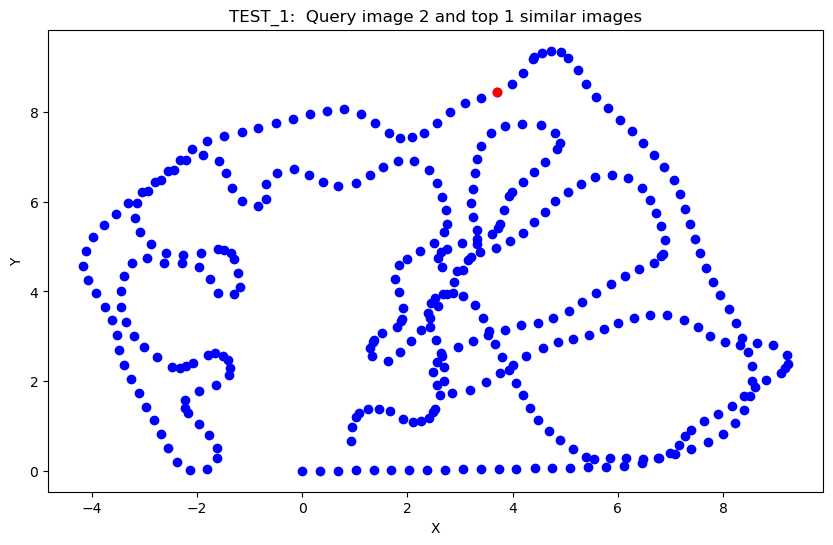

In [9]:
image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
image_reloc = Image.open(image_reloc_path  + 'test_1/' + 'image_reloc_0_2.jpg')

gist_query = leargist.color_gist(image_reloc)

similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])

sorted_indices = similarities.argsort()
top_N_indices = sorted_indices[:N]
top_N_images = gist_dataset[top_N_indices]
# Extract XY positions of top 10 images
top_N_positions_2 = top_N_images[:, 1:3]
top_N_similarities_2 = similarities[top_N_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
plt.scatter(top_N_positions_2[:, 0], top_N_positions_2[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_1:  Query image 2 and top {N} similar images')
plt.show()

#### TEST 1 - Query 3 - Top 1

/tmp/ipykernel_17782/3652937860.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_query = leargist.color_gist(image_reloc)


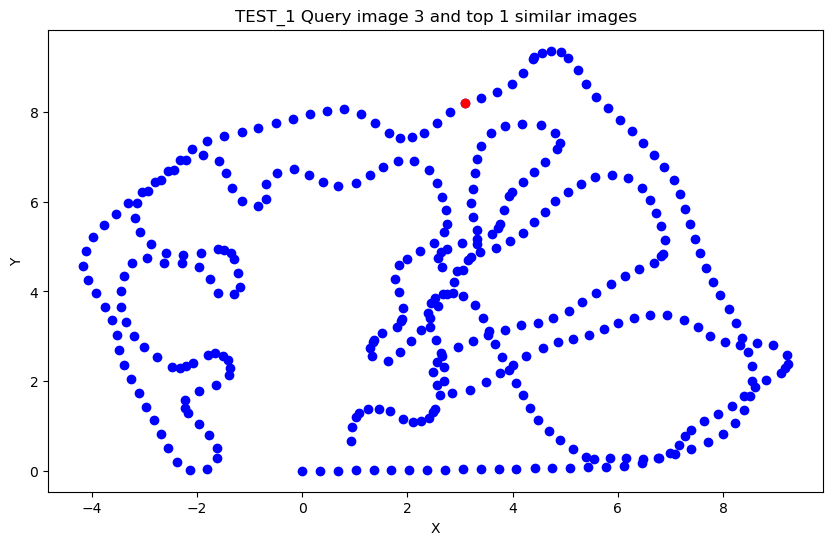

In [10]:
image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
image_reloc = Image.open(image_reloc_path + 'test_1/' + 'image_reloc_0_3.jpg')

gist_query = leargist.color_gist(image_reloc)

similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])

sorted_indices = similarities.argsort()
top_N_indices = sorted_indices[:N]
top_N_images = gist_dataset[top_N_indices]
# Extract XY positions of top 10 images
top_N_positions_3 = top_N_images[:, 1:3]
top_N_similarities_3 = similarities[top_N_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
plt.scatter(top_N_positions_3[:, 0], top_N_positions_3[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_1 Query image 3 and top {N} similar images')
plt.show()

#### TEST 1 - Concatenation of top poses - Top 1

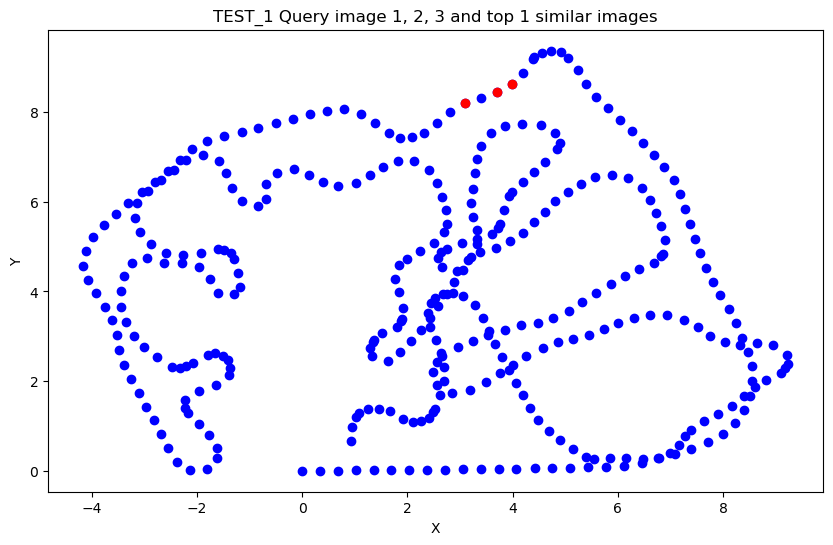

In [11]:
all_top_positions = np.concatenate((top_N_positions_1, top_N_positions_2, top_N_positions_3))
all_top_positions = np.unique(all_top_positions, axis=0)
top_N_similarities = np.concatenate((top_N_similarities_1, top_N_similarities_2, top_N_similarities_3))
filtered_top_positions = all_top_positions

# Filter with DBSCAN
#clustering = DBSCAN(eps=0.5, min_samples=3).fit(all_top_positions)
#filtered_top_positions = all_top_positions[clustering.labels_ != -1]

# Plot all poses in blue
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
# Plot the top poses in red
plt.scatter(filtered_top_positions[:, 0], filtered_top_positions[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_1 Query image 1, 2, 3 and top {N} similar images')
plt.show()

#### TEST 1 - Query 1 - Top 10

/tmp/ipykernel_17782/1618650611.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_query = leargist.color_gist(image_reloc)


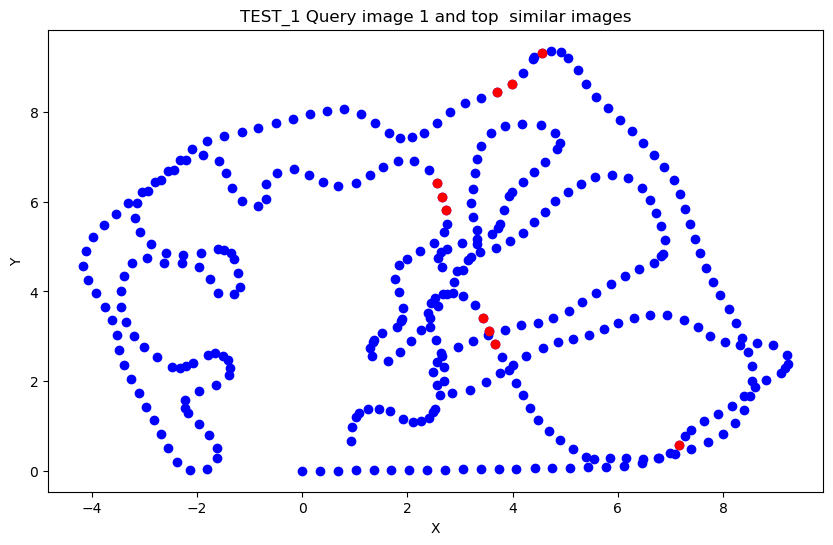

In [12]:
image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
image_reloc = Image.open(image_reloc_path + 'test_1/' + 'image_reloc_0_1.jpg')

# Top N similar images
N = 10

# Compute GIST descriptor of query image
gist_query = leargist.color_gist(image_reloc)

# Compute Euclidean similarities
similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])

sorted_indices = similarities.argsort()
top_N_indices = sorted_indices[:N]
top_N_images = gist_dataset[top_N_indices]

# Extract XY positions of top 10 images
top_N_positions_1 = top_N_images[:, 1:3]
top_N_similarities_1 = similarities[top_N_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
plt.scatter(top_N_positions_1[:, 0], top_N_positions_1[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TEST_1 Query image 1 and top  similar images')
plt.show()

### TEST 1 - Query 2 - Top 10

/tmp/ipykernel_693/51145173.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_query = leargist.color_gist(image_reloc)


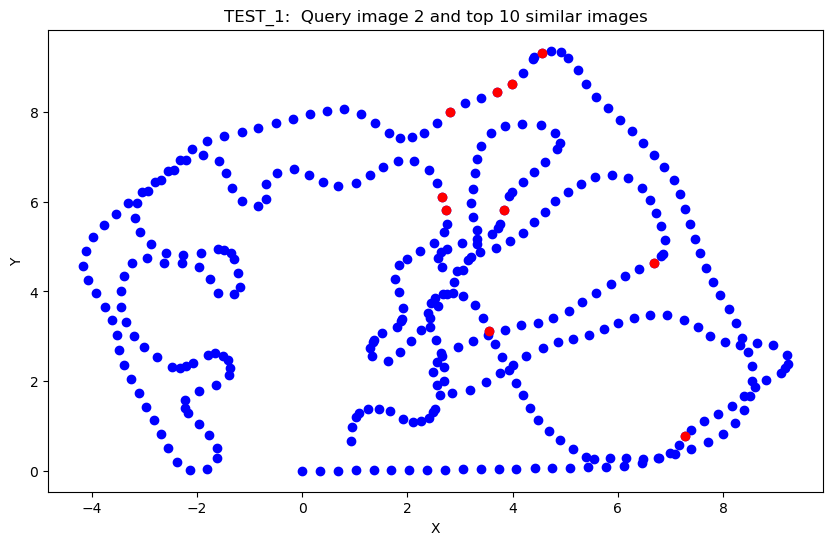

In [13]:
image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
image_reloc = Image.open(image_reloc_path  + 'test_1/' + 'image_reloc_0_2.jpg')

gist_query = leargist.color_gist(image_reloc)

similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])

sorted_indices = similarities.argsort()
top_N_indices = sorted_indices[:N]
top_N_images = gist_dataset[top_N_indices]
# Extract XY positions of top 10 images
top_N_positions_2 = top_N_images[:, 1:3]
top_N_similarities_2 = similarities[top_N_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
plt.scatter(top_N_positions_2[:, 0], top_N_positions_2[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_1:  Query image 2 and top {N} similar images')
plt.show()

### TEST 1 - Query 3 - Top 10

/tmp/ipykernel_693/1113617306.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_query = leargist.color_gist(image_reloc)


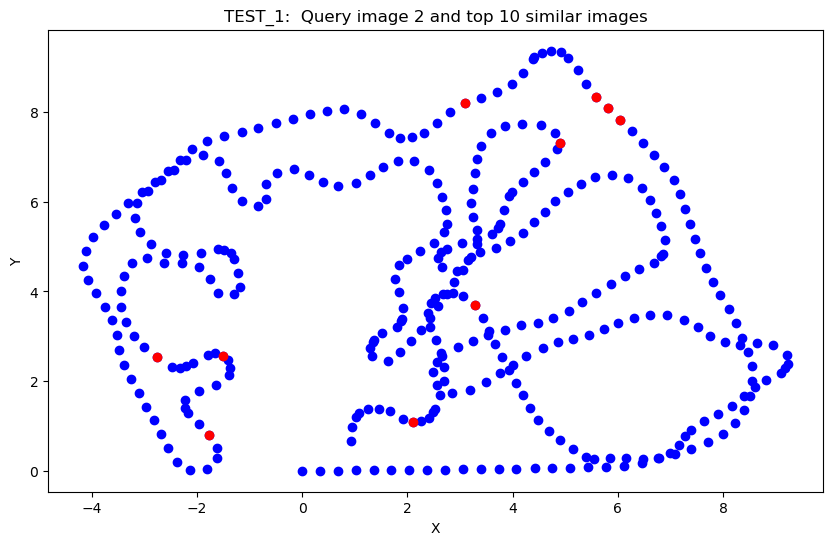

In [14]:
image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
image_reloc = Image.open(image_reloc_path  + 'test_1/' + 'image_reloc_0_3.jpg')

gist_query = leargist.color_gist(image_reloc)

similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])

sorted_indices = similarities.argsort()
top_N_indices = sorted_indices[:N]
top_N_images = gist_dataset[top_N_indices]
# Extract XY positions of top 10 images
top_N_positions_2 = top_N_images[:, 1:3]
top_N_similarities_2 = similarities[top_N_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
plt.scatter(top_N_positions_2[:, 0], top_N_positions_2[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_1:  Query image 2 and top {N} similar images')
plt.show()

### TEST 1 - Concatenation - Top 10

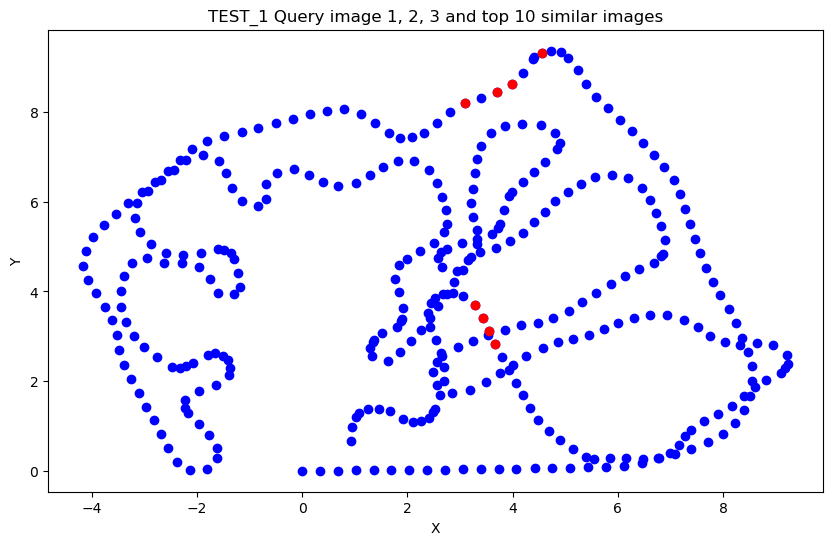

In [16]:
all_top_positions = np.concatenate((top_N_positions_1, top_N_positions_2, top_N_positions_3))
all_top_positions = np.unique(all_top_positions, axis=0)
top_N_similarities = np.concatenate((top_N_similarities_1, top_N_similarities_2, top_N_similarities_3))
filtered_top_positions = all_top_positions

# Filter with DBSCAN
clustering = DBSCAN(eps=1, min_samples=4).fit(all_top_positions)
filtered_top_positions = all_top_positions[clustering.labels_ != -1]

# Plot all poses in blue
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
# Plot the top poses in red
plt.scatter(filtered_top_positions[:, 0], filtered_top_positions[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_1 Query image 1, 2, 3 and top {N} similar images')
plt.show()

### TEST 2 - Query 1 - Top 10

/tmp/ipykernel_17782/790770309.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_query = leargist.color_gist(image_reloc)


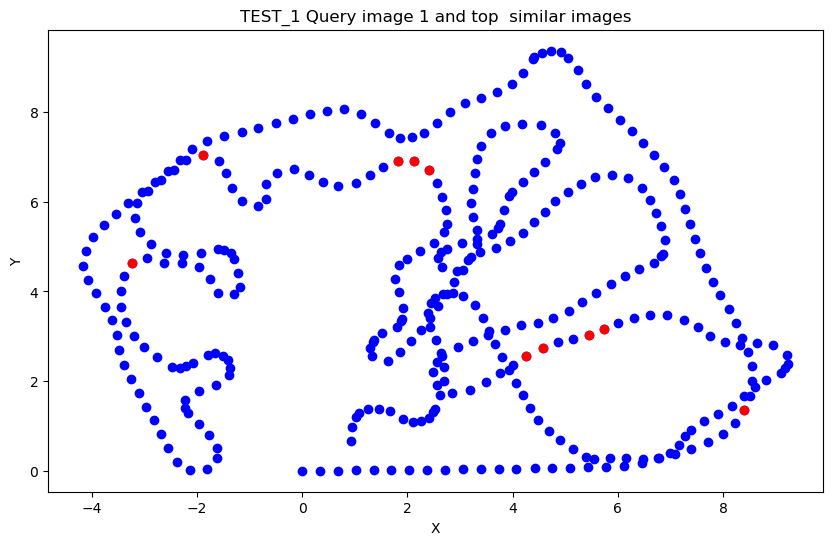

In [13]:
image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
image_reloc = Image.open(image_reloc_path + 'test_2/' + 'image_reloc_0_1.jpg')

# Top N similar images
N = 10

# Compute GIST descriptor of query image
gist_query = leargist.color_gist(image_reloc)

# Compute Euclidean similarities
similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])

sorted_indices = similarities.argsort()
top_N_indices = sorted_indices[:N]
top_N_images = gist_dataset[top_N_indices]

# Extract XY positions of top 10 images
top_N_positions_1 = top_N_images[:, 1:3]
top_N_similarities_1 = similarities[top_N_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
plt.scatter(top_N_positions_1[:, 0], top_N_positions_1[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TEST_1 Query image 1 and top  similar images')
plt.show()

### TEST 2 - Query 2 - Top 10

/tmp/ipykernel_17782/3686401880.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_query = leargist.color_gist(image_reloc)


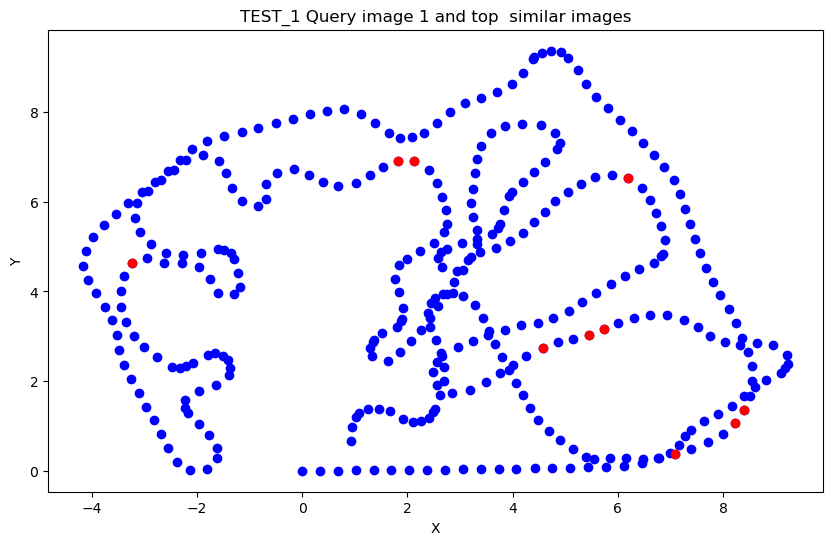

In [14]:
image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
image_reloc = Image.open(image_reloc_path + 'test_2/' + 'image_reloc_0_2.jpg')

# Compute GIST descriptor of query image
gist_query = leargist.color_gist(image_reloc)

# Compute Euclidean similarities
similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])

sorted_indices = similarities.argsort()
top_N_indices = sorted_indices[:N]
top_N_images = gist_dataset[top_N_indices]

# Extract XY positions of top 10 images
top_N_positions_2 = top_N_images[:, 1:3]
top_N_similarities_2 = similarities[top_N_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
plt.scatter(top_N_positions_2[:, 0], top_N_positions_2[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TEST_1 Query image 1 and top  similar images')
plt.show()

### TEST 2 - Query 3 - Top 10

/tmp/ipykernel_17782/709611189.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_query = leargist.color_gist(image_reloc)


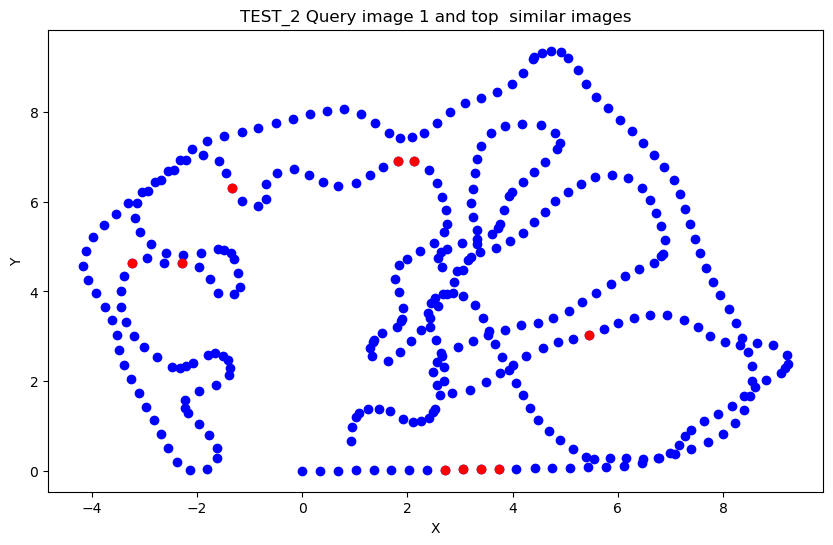

In [15]:
image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
image_reloc = Image.open(image_reloc_path + 'test_2/' + 'image_reloc_0_3.jpg')

# Compute GIST descriptor of query image
gist_query = leargist.color_gist(image_reloc)

# Compute Euclidean similarities
similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])

sorted_indices = similarities.argsort()
top_N_indices = sorted_indices[:N]
top_N_images = gist_dataset[top_N_indices]

# Extract XY positions of top 10 images
top_N_positions_3 = top_N_images[:, 1:3]
top_N_similarities_3 = similarities[top_N_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
plt.scatter(top_N_positions_3[:, 0], top_N_positions_3[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TEST_2 Query image 1 and top  similar images')
plt.show()

### TEST 2 - Concatenation - Top 10

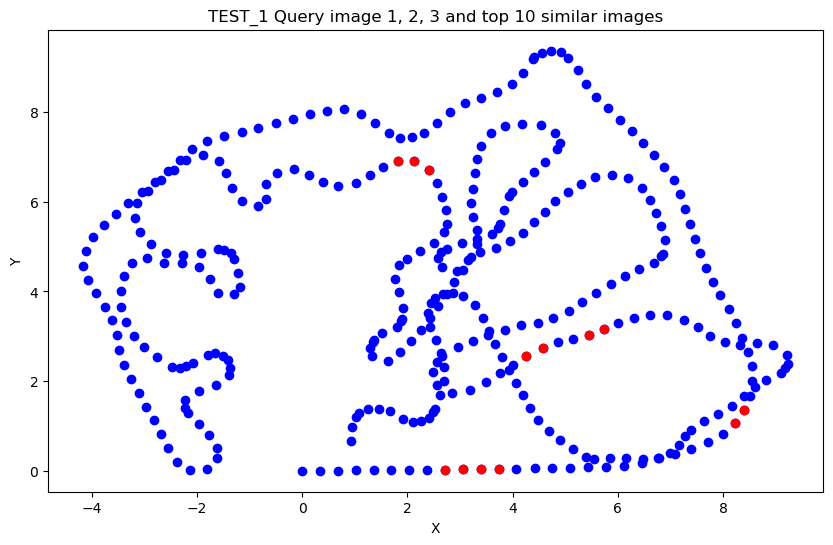

In [16]:
all_top_positions = np.concatenate((top_N_positions_1, top_N_positions_2, top_N_positions_3))
all_top_positions = np.unique(all_top_positions, axis=0)
top_N_similarities = np.concatenate((top_N_similarities_1, top_N_similarities_2, top_N_similarities_3))
filtered_top_positions = all_top_positions

# Filter with DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=2).fit(all_top_positions)
filtered_top_positions = all_top_positions[clustering.labels_ != -1]

# Plot all poses in blue
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
# Plot the top poses in red
plt.scatter(filtered_top_positions[:, 0], filtered_top_positions[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_1 Query image 1, 2, 3 and top {N} similar images')
plt.show()

### TEST 3 with N query images for relocalization

/tmp/ipykernel_17782/832874814.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_queries = np.array([leargist.color_gist(image) for image in query_images])


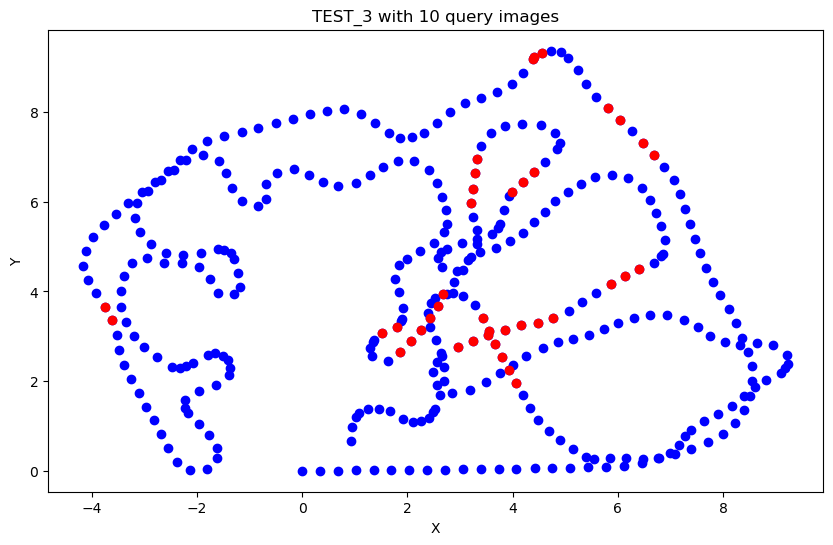

In [18]:
import os
import re
import numpy as np
from PIL import Image
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import leargist

N = 10

# Sort images by name
def extract_number(image_file):
    match = re.search(r'\d+', image_file)
    return int(match.group()) if match else float('inf')

image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
test_path = 'test_3/'
image_files = os.listdir(image_reloc_path + test_path)
image_files.sort(key=extract_number)

# Pre-load all query images and compute their GIST descriptors
query_images = [Image.open(image_reloc_path + test_path + image_file) for image_file in image_files]
gist_queries = np.array([leargist.color_gist(image) for image in query_images])

all_top_positions = np.empty((0, 2))

for gist_query in gist_queries:
    # Compute Euclidean similarities
    similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])
    
    # Top N similar images
    sorted_indices = similarities.argsort()
    top_N_indices = sorted_indices[:N]
    top_N_images = gist_dataset[top_N_indices]
    
    # Extract XY positions of top 10 images
    top_N_positions = top_N_images[:, 1:3]
    
    # Add top N positions to all top positions
    all_top_positions = np.concatenate((all_top_positions, top_N_positions))
    
all_top_positions = np.unique(all_top_positions, axis=0)
filtered_top_positions = all_top_positions

# Filter with DBSCAN
clustering = DBSCAN(eps=0.35, min_samples=2).fit(all_top_positions)
filtered_top_positions = all_top_positions[clustering.labels_ != -1]

# Plot all poses in blue
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
# Plot the top poses in red
plt.scatter(filtered_top_positions[:, 0], filtered_top_positions[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_3 with {N} query images')
plt.show()



### TEST 4

/tmp/ipykernel_14643/2367785406.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_queries = np.array([leargist.color_gist(image) for image in query_images])


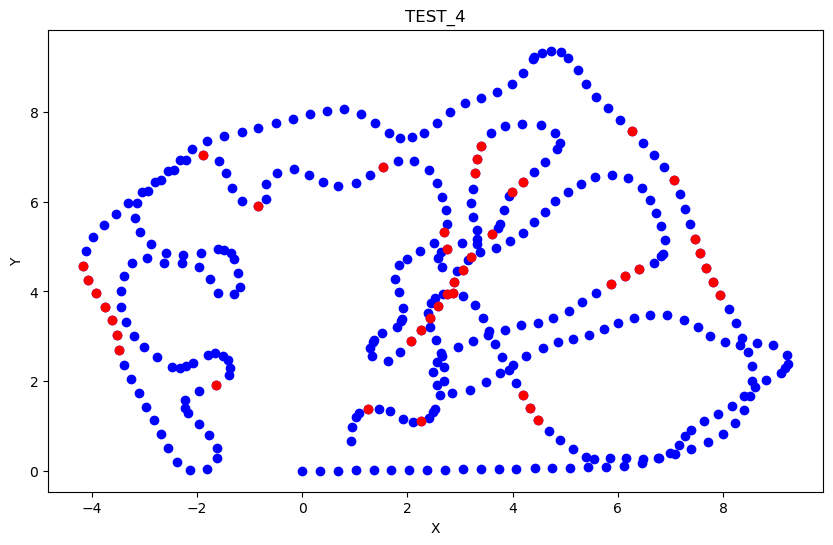

In [7]:
N = 10
filter = False
# Sort images by name
def extract_number(image_file):
    match = re.search(r'\d+', image_file)
    return int(match.group()) if match else float('inf')

image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
test_path = 'test_4/'
image_files = os.listdir(image_reloc_path + test_path)
image_files.sort(key=extract_number)

# Pre-load all query images and compute their GIST descriptors
query_images = [Image.open(image_reloc_path + test_path + image_file) for image_file in image_files]
gist_queries = np.array([leargist.color_gist(image) for image in query_images])

all_top_positions = np.empty((0, 2))

for gist_query in gist_queries:
    # Compute Euclidean similarities
    similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])
    
    # Top N similar images
    sorted_indices = similarities.argsort()
    top_N_indices = sorted_indices[:N]
    top_N_images = gist_dataset[top_N_indices]
    
    # Extract XY positions of top 10 images
    top_N_positions = top_N_images[:, 1:3]
    
    # Add top N positions to all top positions
    all_top_positions = np.concatenate((all_top_positions, top_N_positions))
    
all_top_positions = np.unique(all_top_positions, axis=0)
filtered_top_positions = all_top_positions

# Filter with DBSCAN
if filter:
    clustering = DBSCAN(eps=0.35, min_samples=2).fit(all_top_positions)
    filtered_top_positions = all_top_positions[clustering.labels_ != -1]

# Plot all poses in blue
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
# Plot the top poses in red
plt.scatter(filtered_top_positions[:, 0], filtered_top_positions[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_4')
plt.show()



### TEST 5

/tmp/ipykernel_14643/2341350433.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_queries = np.array([leargist.color_gist(image) for image in query_images])


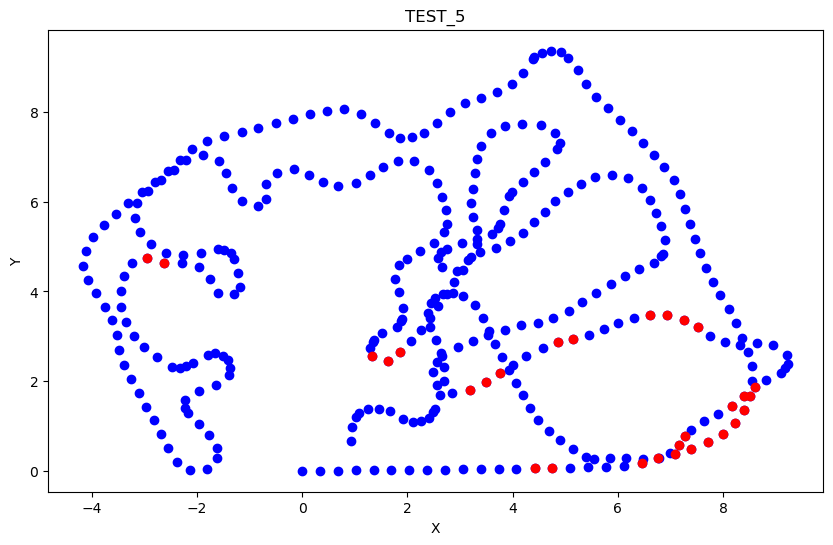

In [9]:
N = 10
filter = True
# Sort images by name
def extract_number(image_file):
    match = re.search(r'\d+', image_file)
    return int(match.group()) if match else float('inf')

image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
test_path = 'test_5/'
image_files = os.listdir(image_reloc_path + test_path)
image_files.sort(key=extract_number)

# Pre-load all query images and compute their GIST descriptors
query_images = [Image.open(image_reloc_path + test_path + image_file) for image_file in image_files]
gist_queries = np.array([leargist.color_gist(image) for image in query_images])

all_top_positions = np.empty((0, 2))

for gist_query in gist_queries:
    # Compute Euclidean similarities
    similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])
    
    # Top N similar images
    sorted_indices = similarities.argsort()
    top_N_indices = sorted_indices[:N]
    top_N_images = gist_dataset[top_N_indices]
    
    # Extract XY positions of top 10 images
    top_N_positions = top_N_images[:, 1:3]
    
    # Add top N positions to all top positions
    all_top_positions = np.concatenate((all_top_positions, top_N_positions))
    
all_top_positions = np.unique(all_top_positions, axis=0)
filtered_top_positions = all_top_positions

# Filter with DBSCAN
if filter:
    clustering = DBSCAN(eps=0.35, min_samples=2).fit(all_top_positions)
    filtered_top_positions = all_top_positions[clustering.labels_ != -1]

# Plot all poses in blue
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
# Plot the top poses in red
plt.scatter(filtered_top_positions[:, 0], filtered_top_positions[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'TEST_5')
plt.show()

### TEST 6

/tmp/ipykernel_14643/1565741985.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  gist_queries = np.array([leargist.color_gist(image) for image in query_images])


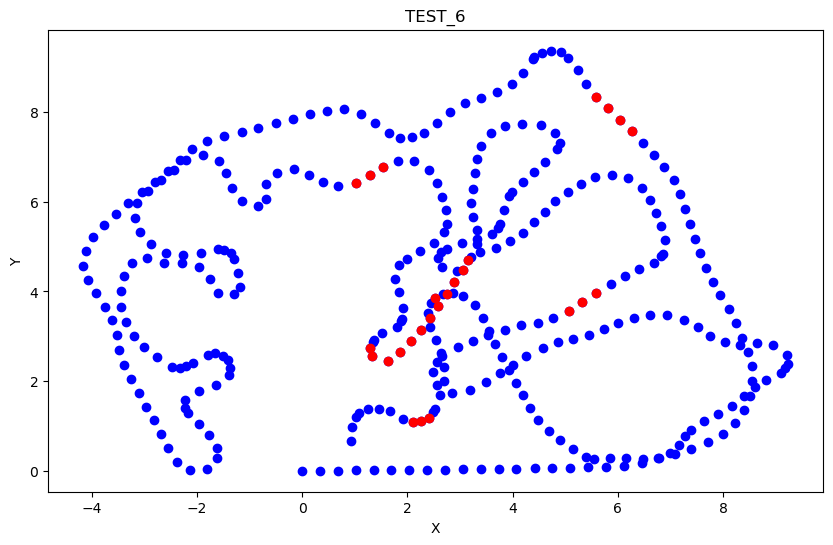

In [10]:
N = 10
filter = True
test = 'test_6'
# Sort images by name
def extract_number(image_file):
    match = re.search(r'\d+', image_file)
    return int(match.group()) if match else float('inf')

image_reloc_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_relocalization/'
test_path = f'{test}/'
image_files = os.listdir(image_reloc_path + test_path)
image_files.sort(key=extract_number)

# Pre-load all query images and compute their GIST descriptors
query_images = [Image.open(image_reloc_path + test_path + image_file) for image_file in image_files]
gist_queries = np.array([leargist.color_gist(image) for image in query_images])

all_top_positions = np.empty((0, 2))

for gist_query in gist_queries:
    # Compute Euclidean similarities
    similarities = np.array([np.linalg.norm(gist_query - gist) for gist in gist_dataset[:, 8:]])
    
    # Top N similar images
    sorted_indices = similarities.argsort()
    top_N_indices = sorted_indices[:N]
    top_N_images = gist_dataset[top_N_indices]
    
    # Extract XY positions of top 10 images
    top_N_positions = top_N_images[:, 1:3]
    
    # Add top N positions to all top positions
    all_top_positions = np.concatenate((all_top_positions, top_N_positions))
    
all_top_positions = np.unique(all_top_positions, axis=0)
filtered_top_positions = all_top_positions

# Filter with DBSCAN
if filter:
    clustering = DBSCAN(eps=0.35, min_samples=3).fit(all_top_positions)
    filtered_top_positions = all_top_positions[clustering.labels_ != -1]

# Plot all poses in blue
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 0], positions[:, 1], color='blue')
# Plot the top poses in red
plt.scatter(filtered_top_positions[:, 0], filtered_top_positions[:, 1], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{test.upper()}')
plt.show()